# Selección de variables


In [79]:
import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import datetime
from dateutil.parser import parse
from sklearn.tree import  DecisionTreeClassifier
import plotly.graph_objects as go
import umap

In [18]:
# Seteo jupyter notebook
pd.set_option('display.max_columns', None)

In [6]:
Data=pd.read_csv("consolidation_30May2022.csv").drop(columns=["Unnamed: 0"]).fillna("")
Data.head()

c:\Users\Jose Luis\anaconda3\envs\Programacion_Cientifica\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


pref_B-B  pref_D-E  pref_C-D  pref_A-A  Duracion_Campaña    B    C  \
0       0.0       0.0       0.0       0.0               1.0  4.0  5.0   
1       0.0       0.0       0.0       0.0               1.0  6.0  6.0   
2       0.0       0.0       0.0       0.0               1.0  2.0  3.0   
3       0.0       0.0       0.0       0.0               1.2  7.0  3.0   
4       0.0       0.0       0.0       0.0               1.0  4.0  1.0   

   lec_B-B  lec_E-E  lec_D-E  ...  Renta  Recibe_sueldo_en_cuenta  \
0      5.0      0.0      0.0  ...     R1                        0   
1      8.0      0.0      1.0  ...     R4                        0   
2      1.0      0.0      0.0  ...     R5                        0   
3      5.0      0.0      0.0  ...     R9                        0   
4      1.0      0.0      0.0  ...     R2                        0   

   Segmento_consumidor  Meses_antiguedad  Comuna  Ciudad  Estado_civil  \
0                    A   Mayor a 10 años   331.0    13.0             D   
1                    A   Mayor a 10 años    91.0    13.0             D   
2                    A   Mayor a 10 años    34.0     5.0             B   
3                    A   Mayor a 10 años   331.0    13.0             B   
4                    B   Mayor a 10 años    37.0     5.0             D   

   Principalidad  Profesion       Target  
0              B       P164               
1              B        P85  E-E B-B D-E  
2              C       P143      D-E A-A  
3              C         P1          E-E  
4              F       P210          D-E  

[5 rows x 44 columns]

<AxesSubplot:>

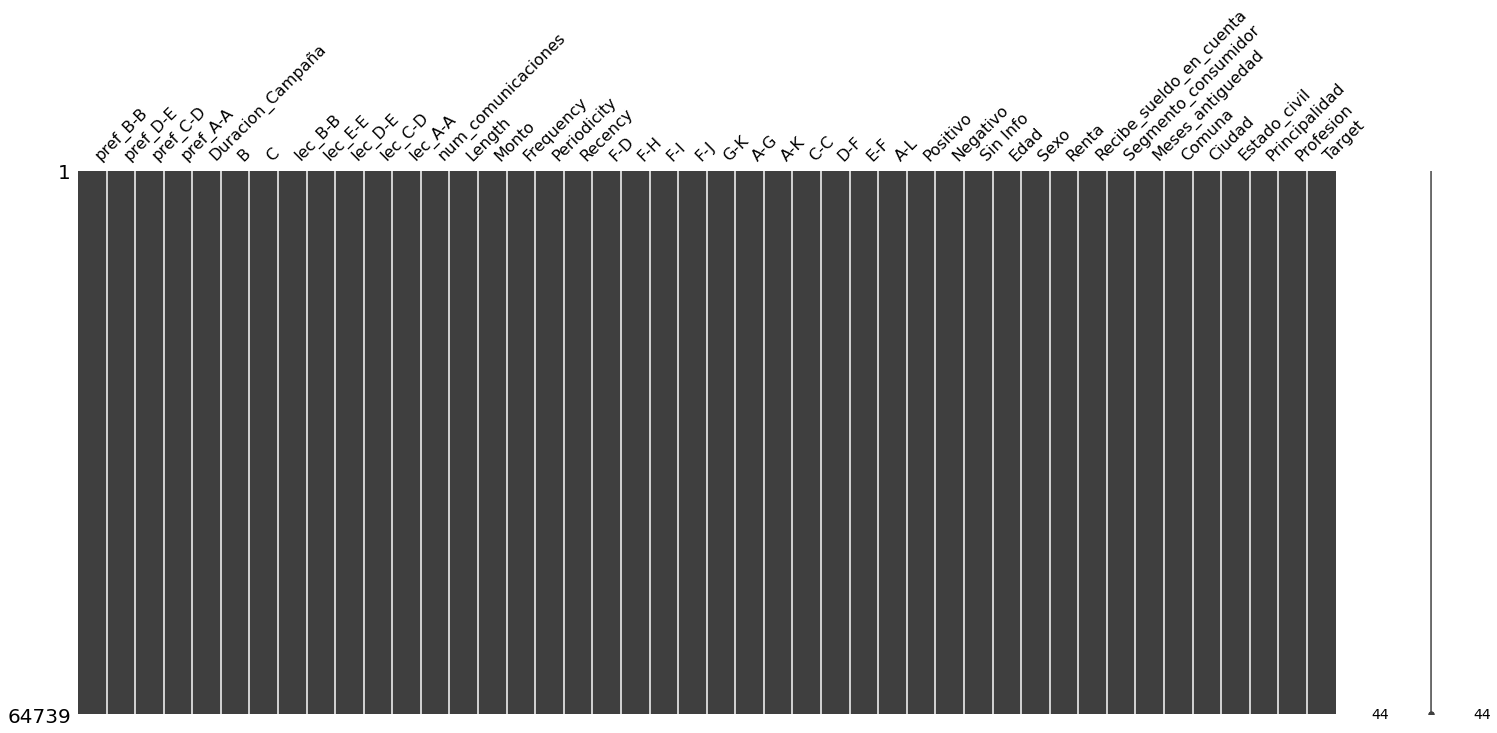

In [17]:
# Missings
msno.matrix(Data)

 **Matriz de correlación**

In [111]:
# datos categorical
categorical=list(Data.select_dtypes(include=["category","object"]).columns)

In [14]:
# Replace valores categoricos por númericos
for i in categorical:
    dic={}
    k=0
    for j in Data[i].unique():
        k=k+1
        dic[j]=k
    Data[i].replace(dic,inplace=True)

In [62]:
# Features - labels

features = Data.drop(columns=["Target"]).copy() 
labels = Data.loc[:,"Target"].copy()

# Generación de conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33,random_state=50)


In [68]:
correlation=(X_train.join(y_train)).corr()

In [75]:
correlation

pref_B-B  pref_D-E  pref_C-D  pref_A-A  \
pref_B-B                      NaN       NaN       NaN       NaN   
pref_D-E                      NaN       NaN       NaN       NaN   
pref_C-D                      NaN       NaN  1.000000  0.007732   
pref_A-A                      NaN       NaN  0.007732  1.000000   
Duracion_Campaña              NaN       NaN  0.032984  0.078865   
B                             NaN       NaN  0.200680  0.095197   
C                             NaN       NaN  0.049324  0.030571   
lec_B-B                       NaN       NaN  0.030673  0.028524   
lec_E-E                       NaN       NaN  0.017696  0.017539   
lec_D-E                       NaN       NaN  0.011449  0.023256   
lec_C-D                       NaN       NaN  0.085623  0.007121   
lec_A-A                       NaN       NaN  0.045239  0.046391   
num_comunicaciones            NaN       NaN  0.046615  0.037445   
Length                        NaN       NaN  0.013674  0.028781   
Monto                         NaN       NaN  0.043860 -0.001061   
Frequency                     NaN       NaN  0.011083  0.015078   
Periodicity                   NaN       NaN  0.004721  0.012190   
Recency                       NaN       NaN  0.013151  0.001369   
F-D                           NaN       NaN  0.035101 -0.007330   
F-H                           NaN       NaN  0.004971  0.000423   
F-I                           NaN       NaN  0.012278  0.025257   
F-J                           NaN       NaN  0.021876  0.010768   
G-K                           NaN       NaN -0.028281 -0.006893   
A-G                           NaN       NaN -0.010914  0.003018   
A-K                           NaN       NaN  0.023314  0.028663   
C-C                           NaN       NaN  0.264215 -0.004439   
D-F                           NaN       NaN  0.001825  0.021011   
E-F                           NaN       NaN -0.008231 -0.016294   
A-L                           NaN       NaN -0.036641 -0.006107   
Positivo                      NaN       NaN  0.126877  0.008955   
Negativo                      NaN       NaN  0.003257  0.015190   
Sin Info                      NaN       NaN -0.010914  0.003018   
Edad                          NaN       NaN -0.045246  0.022024   
Sexo                          NaN       NaN  0.005540  0.019099   
Renta                         NaN       NaN  0.004815  0.024853   
Recibe_sueldo_en_cuenta       NaN       NaN  0.000263  0.028124   
Segmento_consumidor           NaN       NaN  0.015193  0.004833   
Meses_antiguedad              NaN       NaN -0.012950  0.001055   
Comuna                        NaN       NaN -0.022084  0.001368   
Ciudad                        NaN       NaN  0.080440  0.002472   
Estado_civil                  NaN       NaN -0.007932  0.001778   
Principalidad                 NaN       NaN  0.084667 -0.013109   
Profesion                     NaN       NaN -0.019436  0.000941   
Target                        NaN       NaN  0.109692  0.076263   

                         Duracion_Campaña         B         C   lec_B-B  \
pref_B-B                              NaN       NaN       NaN       NaN   
pref_D-E                              NaN       NaN       NaN       NaN   
pref_C-D                         0.032984  0.200680  0.049324  0.030673   
pref_A-A                         0.078865  0.095197  0.030571  0.028524   
Duracion_Campaña                 1.000000  0.437933  0.238271  0.177066   
B                                0.437933  1.000000  0.167122  0.158157   
C                                0.238271  0.167122  1.000000  0.829416   
lec_B-B                          0.177066  0.158157  0.829416  1.000000   
lec_E-E                          0.127381  0.075926  0.551330  0.431727   
lec_D-E                          0.134347  0.091856  0.566695  0.432036   
lec_C-D                          0.143860  0.142791  0.537912  0.380110   
lec_A-A                          0.169447  0.333011  0.183030  0.175058   
num_comunicaciones               0

In [69]:
pd.DataFrame(correlation["Target"].sort_values(ascending=False))

Target
Target                   1.000000
C-C                      0.366109
Positivo                 0.364187
Frequency                0.220384
num_comunicaciones       0.218880
Recency                  0.215139
lec_C-D                  0.200054
Negativo                 0.197292
F-J                      0.196758
B                        0.187313
D-F                      0.186754
A-K                      0.182761
Length                   0.169452
Sin Info                 0.167336
A-G                      0.167336
E-F                      0.155020
Principalidad            0.155008
C                        0.142392
lec_B-B                  0.127684
F-I                      0.118418
F-H                      0.112559
pref_C-D                 0.109692
Ciudad                   0.108906
Segmento_consumidor      0.107093
F-D                      0.105528
Duracion_Campaña         0.101263
pref_A-A                 0.076263
lec_A-A                  0.069910
Recibe_sueldo_en_cuenta  0.064005
G-K                      0.062164
lec_D-E                  0.039762
lec_E-E                  0.037268
Monto                    0.035348
Periodicity              0.035241
Renta                    0.035196
Sexo                    -0.015168
A-L                     -0.015777
Meses_antiguedad        -0.027327
Estado_civil            -0.043648
Profesion               -0.057595
Comuna                  -0.077183
Edad                    -0.083518
pref_B-B                      NaN
pref_D-E                      NaN

**Normalización de variables**

In [42]:
# Columns transformer
preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('MinMaxScaler',MinMaxScaler(),
         features.columns),
    ])

pipe = Pipeline(
    [("preprocesamiento", preprocessing_transformer)]
)

In [43]:
# Entrenamiento de pípeline
X_train=pd.DataFrame(pipe.fit_transform(X_train),columns=features.columns)

In [44]:
# Según el aporte de información con el criterio gini de un arbol de decisión
fs = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
fs.fit(X_train, y_train.astype(int))

DecisionTreeClassifier(max_depth=10, random_state=1)

In [45]:
var_num = 30
table = pd.DataFrame({'Tags': features.columns, 'Value': fs.feature_importances_})
table['Abs_Value'] = table['Value'].abs()
table = table[table['Abs_Value']>0].sort_values(by='Abs_Value', ascending=False, ignore_index=True)
tree_fs = table.loc[:var_num, 'Tags'].to_list()

In [49]:
# Plot
fig = go.Figure([go.Bar(x=table["Tags"], y=table["Abs_Value"])])

fig.update_layout(
    title_text="Importancia de variables",
)

fig.show()

In [70]:
# Corr
correlations = features.corr()

fig=px.imshow(correlations,
          labels=dict(x="", y="", color="Correlation"),
          x=features.columns,
          y=features.columns,
          zmin=-1,
          zmax=1,
          color_continuous_scale="Inferno")

fig.layout.height = 1000
fig.layout.width = 1000

fig.show()

In [71]:
def corrkill(dataframe, features, corr_cut=0.7):

    df = dataframe[features]
    dfcorr = pd.DataFrame(np.triu(df.corr()), columns=df.columns, index=df.columns)
    dfcorr = dfcorr.stack().reset_index()
    dfcorr.columns = ['Feat1','Feat2','Val']
    dfcorr = dfcorr[~dfcorr['Val'].isin([0,1])]
    dfcorr = dfcorr[dfcorr['Val'].abs()>corr_cut]
    
    return list(dfcorr['Feat2']), dfcorr

In [73]:
collinearity, table_cor=corrkill(features, tree_fs)
tag_select = [i for i in tree_fs if i not in collinearity]
tags_view_corr = features[tag_select].copy().reset_index(drop=True)

In [74]:
# Corr
correlations = tags_view_corr.corr()

fig=px.imshow(correlations,
          labels=dict(x="", y="", color="Correlation"),
          x=tag_select,
          y=tag_select,
          zmin=-1,
          zmax=1,
          color_continuous_scale="Inferno")

fig.layout.height = 700
fig.layout.width = 700
fig.update_xaxes(
        tickangle = 45)

fig.show()

# Visualización de baja dimensionalidad

In [102]:
Data=pd.read_csv("consolidation_30May2022.csv").drop(columns=["Unnamed: 0"]).fillna("")[tag_select+["Target"]]

In [103]:
# datos númericos
numerical=list(Data.select_dtypes(exclude=["category","object"]).columns)



# datos categorical
categorical=list(Data.select_dtypes(include=["category","object"]).columns)
categorical.remove("Target")


In [104]:
for i in categorical:
    Data[i]=Data[i].astype(str)

In [105]:
# Pipeline provisorio para pre-procesar los datos y luego realizar reducción de dimensionalidad

# Columns transformer
preprocessing_transformer = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(handle_unknown="ignore"),  
          categorical),
        ('StandardScaler', MinMaxScaler(),
         numerical),
    ])

#Pipelines

pipe_process_2d_umap = Pipeline(
    [("preprocesamiento", preprocessing_transformer),("reducción de dimensionalidad",
                                                      umap.UMAP(n_components=2, random_state=42))]
)

pipe_process_3d_umap = Pipeline(
    [("preprocesamiento", preprocessing_transformer),("reducción de dimensionalidad",
                                                      umap.UMAP(n_components=3, random_state=42))]
)

In [106]:
# Dataframes de baja dimensionalidad

data_process_2d_umap=pd.DataFrame(pipe_process_2d_umap.fit_transform(Data),columns=['x_umap','y_umap'])
data_process_3d_umap=pd.DataFrame(pipe_process_3d_umap.fit_transform(Data),columns=['x_umap','y_umap','z_umap'])

In [113]:
Data["Target"].replace("","Nada",inplace=True)

In [114]:
data_process_2d_umap["Target"]=Data["Target"]
data_process_3d_umap["Target"]=Data["Target"]


In [115]:
Data["Target"].unique()

array(['Nada', 'E-E B-B D-E', 'D-E A-A', 'E-E', 'D-E', 'D-E B-B',
       'B-B E-E', 'D-E E-E B-B', 'B-B D-E', 'A-A B-B', 'C-D B-B D-E',
       'E-E B-B', 'B-B', 'C-D E-E', 'C-D B-B', 'C-D', 'D-E E-E',
       'C-D D-E B-B', 'E-E D-E', 'C-D E-E D-E', 'B-B D-E E-E',
       'E-E D-E B-B', 'C-D D-E', 'B-B E-E D-E', 'A-A', 'D-E C-D B-B',
       'A-A D-E', 'D-E C-D', 'D-E B-B E-E', 'E-E C-D', 'B-B C-D',
       'D-E B-B C-D'], dtype=object)

In [117]:
# estimated_sells
px.scatter(data_process_2d_umap, x='x_umap', y='y_umap',color="Target", title='2d UMAP')

In [110]:
# estimated_sells
fig = px.scatter_3d(
    data_process_3d_umap,
    x='x_umap',
    y='y_umap',
    z='z_umap',
    color="Target",
    title='3d UMAP'
)
fig.show()